# CrowdTruth for Temporal Event Ordering Annotation

This analysis uses the data gathered in the "Event Annotation" crowdsourcing experiment published in *Rion Snow, Brendan O’Connor, Dan Jurafsky, and Andrew Y. Ng: Cheap and fast—but is it good? Evaluating non-expert annotations for natural language tasks. EMNLP 2008, pages 254–263*.

**Task Description**: Given *two events* in a text, the crowd has to choose whether the first event happened *"strictly before"* or *"strictly after"* the second event. Following, we provide an example from the aforementioned publication:

**Text**: “It just *blew* up in the air, and then we *saw* two fireballs *go* down to the, to the water, and there was a big small, ah, smoke, from ah, *coming* up from that”.

**Events**: go/coming, or blew/saw

A screenshot of the task as it appeared to workers can be seen at the following [repository](http://ai.stanford.edu/ ̃rion/annotations/).

The dataset for this task was downloaded from the following [repository](http://ai.stanford.edu/ ̃rion/annotations/), which contains the raw output from the crowd on AMT. Currently, you can find the processed input file in the folder named `data`. Besides the raw crowd annotations, the processed file also contains the sentence and the two events that were given as input to the crowd (for part of the dataset).

In [1]:
import pandas as pd

test_data = pd.read_csv("../data/temp.standardized.csv")
test_data.head()

,!amt_annotation_ids,!amt_worker_ids,orig_id,response,gold,start,end,event1,event2,text
0,1Z0ZWAY8NYBZJWY7FX302YKE055D9GPWYZ0PBZ40,A2HTGQE4AACVRV,42_0,before,before,Mon Mar 25 07:39:42 PDT 2019,Mon Mar 25 07:41:05 PDT 2019,NaN,NaN,NaN
1,1Z0ZWAY8NYBZJWY7FX30PRAZNZYKT9ZZ7KC9Z3AZ,AYHHOK9GDSWNH,42_0,before,before,Mon Mar 25 07:39:42 PDT 2019,Mon Mar 25 07:41:05 PDT 2019,NaN,NaN,NaN
2,1Z0ZWAY8NYBZJWY7FX30G0PZ28ZQ106ZGBYHSY8Z,A1QRQZWBL1SVEX,42_0,before,before,Mon Mar 25 07:39:42 PDT 2019,Mon Mar 25 07:41:05 PDT 2019,NaN,NaN,NaN
3,1Z0ZWAY8NYBZJWY7FX30BY0PNWYK0S2ZSADRYXP0,A3G0MGLBT484I1,42_0,before,before,Mon Mar 25 07:39:42 PDT 2019,Mon Mar 25 07:41:05 PDT 2019,NaN,NaN,NaN
4,1Z0ZWAY8NYBZJWY7FX30HHZZVJ45HJC2T1ZWTZ20,A7NC1H5ZK7TO0,42_0,before,before,Mon Mar 25 07:39:42 PDT 2019,Mon Mar 25 07:41:05 PDT 2019,NaN,NaN,NaN


## Declaring a pre-processing configuration

The pre-processing configuration defines how to interpret the raw crowdsourcing input. To do this, we need to define a configuration class. First, we import the default CrowdTruth configuration class:

In [2]:
import crowdtruth
from crowdtruth.configuration import DefaultConfig

Our test class inherits the default configuration `DefaultConfig`, while also declaring some additional attributes that are specific to the Temporal Event Ordering task:

* **`inputColumns`:** list of input columns from the .csv file with the input data
* **`outputColumns`:** list of output columns from the .csv file with the answers from the workers
* **`customPlatformColumns`:** a list of columns from the .csv file that defines a standard annotation tasks, in the following order - judgment id, unit id, worker id, started time, submitted time. This variable is used for input files that do not come from AMT or FigureEight (formarly known as CrowdFlower).
* **`annotation_separator`:** string that separates between the crowd annotations in `outputColumns`
* **`open_ended_task`:** boolean variable defining whether the task is open-ended (i.e. the possible crowd annotations are not known beforehand, like in the case of free text input); in the task that we are processing, workers pick the answers from a pre-defined list, therefore the task is not open ended, and this variable is set to `False`
* **`annotation_vector`:** list of possible crowd answers, mandatory to declare when `open_ended_task` is `False`; for our task, this is the list of relations
* **`processJudgments`:** method that defines processing of the raw crowd data; for this task, we process the crowd answers to correspond to the values in `annotation_vector`

The complete configuration class is declared below:

In [26]:
class TestConfig(DefaultConfig):
    inputColumns = ["gold", "event1", "event2", "text"]
    outputColumns = ["response"]
    customPlatformColumns = ["!amt_annotation_ids", "orig_id", "!amt_worker_ids", "start", "end"]
    
    # processing of a closed task
    open_ended_task = True
    annotation_vector = ["before", "after"]
    
    def processJudgments(self, judgments):
        # pre-process output to match the values in annotation_vector
        for col in self.outputColumns:
            # transform to lowercase
            judgments[col] = judgments[col].apply(lambda x: str(x).lower())
        return judgments

## Pre-processing the input data

After declaring the configuration of our input file, we are ready to pre-process the crowd data:

In [27]:
data, config = crowdtruth.load(
    file = "../data/temp.standardized.csv",
    config = TestConfig()
)

data['judgments'].head()

,output.response,output.response.count,output.response.unique,started,unit,submitted,worker,duration,job
judgment,,,,,,,,,
1Z0ZWAY8NYBZJWY7FX302YKE055D9GPWYZ0PBZ40,{u'before': 1},1,1,2019-03-25 07:39:42-07:00,42_0,2019-03-25 07:41:05-07:00,A2HTGQE4AACVRV,83,../data/temp.standardized
1Z0ZWAY8NYBZJWY7FX30PRAZNZYKT9ZZ7KC9Z3AZ,{u'before': 1},1,1,2019-03-25 07:39:42-07:00,42_0,2019-03-25 07:41:05-07:00,AYHHOK9GDSWNH,83,../data/temp.standardized
1Z0ZWAY8NYBZJWY7FX30G0PZ28ZQ106ZGBYHSY8Z,{u'before': 1},1,1,2019-03-25 07:39:42-07:00,42_0,2019-03-25 07:41:05-07:00,A1QRQZWBL1SVEX,83,../data/temp.standardized
1Z0ZWAY8NYBZJWY7FX30BY0PNWYK0S2ZSADRYXP0,{u'before': 1},1,1,2019-03-25 07:39:42-07:00,42_0,2019-03-25 07:41:05-07:00,A3G0MGLBT484I1,83,../data/temp.standardized
1Z0ZWAY8NYBZJWY7FX30HHZZVJ45HJC2T1ZWTZ20,{u'before': 1},1,1,2019-03-25 07:39:42-07:00,42_0,2019-03-25 07:41:05-07:00,A7NC1H5ZK7TO0,83,../data/temp.standardized


## Computing the CrowdTruth metrics

The pre-processed data can then be used to calculate the CrowdTruth metrics:

In [28]:
results = crowdtruth.run(data, config)

`results` is a dict object that contains the quality metrics for the sentences, annotations and crowd workers.

The **sentence metrics** are stored in `results["units"]`:

In [29]:
results["units"].head()

,duration,input.event1,input.event2,input.gold,input.text,job,output.response,output.response.annotations,output.response.unique_annotations,worker,uqs,unit_annotation_score,uqs_initial,unit_annotation_score_initial
unit,,,,,,,,,,,,,,
100_1,83,NaN,NaN,before,NaN,../data/temp.standardized,"{u'after': 3, u'before': 7}",10,2,10,0.947686,"{u'after': 0.97631961088, u'before': 0.0236803...",0.800000,"{u'after': 0.9, u'before': 0.1}"
102_0,83,NaN,NaN,after,NaN,../data/temp.standardized,"{u'after': 7, u'before': 3}",10,2,10,0.947686,"{u'after': 0.97631961088, u'before': 0.0236803...",0.800000,"{u'after': 0.9, u'before': 0.1}"
102_1,83,NaN,NaN,before,NaN,../data/temp.standardized,"{u'after': 3, u'before': 7}",10,2,10,0.749047,"{u'after': 0.127436625044, u'before': 0.872563...",0.644444,"{u'after': 0.2, u'before': 0.8}"
103_1,83,NaN,NaN,before,NaN,../data/temp.standardized,"{u'after': 3, u'before': 7}",10,2,10,0.749047,"{u'after': 0.127436625044, u'before': 0.872563...",0.644444,"{u'after': 0.2, u'before': 0.8}"
103_11,83,NaN,NaN,before,NaN,../data/temp.standardized,"{u'after': 2, u'before': 8}",10,2,10,0.749047,"{u'after': 0.127436625044, u'before': 0.872563...",0.644444,"{u'after': 0.2, u'before': 0.8}"


The `uqs` column in `results["units"]` contains the **sentence quality scores**, capturing the overall workers agreement over each sentences. Here we plot its histogram:

Text(0,0.5,'# Units')

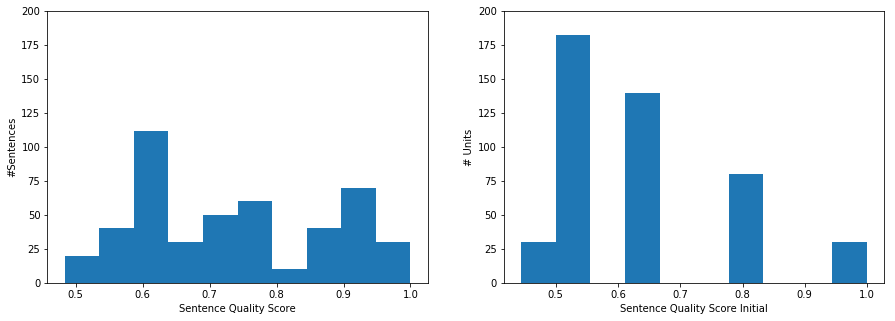

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = 15, 5

plt.subplot(1, 2, 1)
plt.hist(results["units"]["uqs"])
plt.ylim(0,200)
plt.xlabel("Sentence Quality Score")
plt.ylabel("#Sentences")

plt.subplot(1, 2, 2)
plt.hist(results["units"]["uqs_initial"])
plt.ylim(0,200)
plt.xlabel("Sentence Quality Score Initial")
plt.ylabel("# Units")


### Plot the change in unit qualtity score at the beginning of the process and at the end

Text(0.5,0,'Sentence Index')

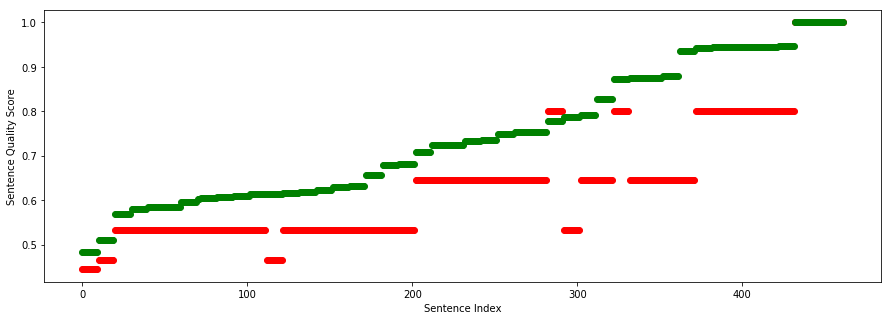

In [31]:
import numpy as np

sortUQS = results["units"].sort_values(['uqs'], ascending=[1])
sortUQS = sortUQS.reset_index()

plt.rcParams['figure.figsize'] = 15, 5

plt.plot(np.arange(sortUQS.shape[0]), sortUQS["uqs_initial"], 'ro', lw = 1, label = "Initial UQS")
plt.plot(np.arange(sortUQS.shape[0]), sortUQS["uqs"], 'go', lw = 1, label = "Final UQS")

plt.ylabel('Sentence Quality Score')
plt.xlabel('Sentence Index')

The `unit_annotation_score` column in `results["units"]` contains the **sentence-annotation scores**, capturing the likelihood that an annotation is expressed in a sentence. For each sentence, we store a dictionary mapping each annotation to its sentence-relation score.

In [32]:
results["units"]["unit_annotation_score"].head()

unit
100_1     {u'after': 0.97631961088, u'before': 0.0236803...
102_0     {u'after': 0.97631961088, u'before': 0.0236803...
102_1     {u'after': 0.127436625044, u'before': 0.872563...
103_1     {u'after': 0.127436625044, u'before': 0.872563...
103_11    {u'after': 0.127436625044, u'before': 0.872563...
Name: unit_annotation_score, dtype: object

Save unit metrics:

In [33]:
rows = []
header = ["orig_id", "gold", "text", "event1", "event2", "uqs_initial", "before", "after", "before_initial", "after_initial"]
rows.append(header)

units = results["units"].reset_index()
for i in range(len(units.index)):
    row = [units["unit"].iloc[i], units["input.gold"].iloc[i], units["input.text"].iloc[i], units["input.event1"].iloc[i],\
           units["input.event2"].iloc[i], units["uqs"].iloc[i], units["uqs_initial"].iloc[i], \
           units["unit_annotation_score"].iloc[i]["before"], units["unit_annotation_score"].iloc[i]["after"], \
           units["unit_annotation_score_initial"].iloc[i]["before"], units["unit_annotation_score_initial"].iloc[i]["after"]]
    rows.append(row)
rows = pd.DataFrame(rows)
rows.to_csv("../data/results/crowdtruth_units_temp.csv", index=False)

The **worker metrics** are stored in `results["workers"]`:

In [34]:
results["workers"].head()

,duration,job,judgment,unit,wqs,wwa,wsa,wqs_initial,wwa_initial,wsa_initial
worker,,,,,,,,,,
A1123L7ANYUTG0,83,1,2,20,0.697544,0.739597,0.943141,0.307615,0.666667,0.461422
A11GX90QFWDLMM,83,1,47,462,0.382631,0.596165,0.641820,0.297884,0.508418,0.585904
A13PCLSK1JA8QL,83,1,1,10,0.732382,0.765848,0.956302,0.351443,0.666667,0.527164
A16QMNGIR7N53M,83,1,1,10,0.708258,0.747553,0.947435,0.515033,0.666667,0.772549
A17743NDSCO8P5,83,1,1,10,0.031159,0.163003,0.191157,0.120099,0.222222,0.540445


The `wqs` columns in `results["workers"]` contains the **worker quality scores**, capturing the overall agreement between one worker and all the other workers.

Text(0,0.5,'#Workers')

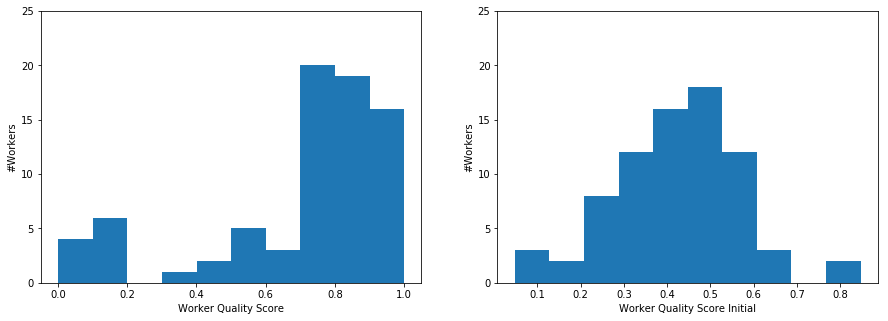

In [35]:
plt.rcParams['figure.figsize'] = 15, 5

plt.subplot(1, 2, 1)
plt.hist(results["workers"]["wqs"])
plt.ylim(0,25)
plt.xlabel("Worker Quality Score")
plt.ylabel("#Workers")

plt.subplot(1, 2, 2)
plt.hist(results["workers"]["wqs_initial"])
plt.ylim(0,25)
plt.xlabel("Worker Quality Score Initial")
plt.ylabel("#Workers")



Save the worker metrics:

In [36]:
results["workers"].to_csv("../data/results/crowdtruth_workers_temp.csv", index=True)

The **annotation metrics** are stored in `results["annotations"]`. The `aqs` column contains the **annotation quality scores**, capturing the overall worker agreement over one relation.

In [37]:
results["annotations"]

,output.response
after,2442.0
before,2178.0


In [38]:
import numpy as np

sortedUQS = results["units"].sort_values(["uqs"])
# remove the units for which we don't have the events and the text
sortedUQS = sortedUQS.dropna()

### Example of a very clear unit

In [39]:
sortedUQS.tail(1)

,duration,input.event1,input.event2,input.gold,input.text,job,output.response,output.response.annotations,output.response.unique_annotations,worker,uqs,unit_annotation_score,uqs_initial,unit_annotation_score_initial
unit,,,,,,,,,,,,,,
9_5,83,"<font color=""green"">haggling</font>","<font color=""orange"">settling</font>",before,"<p>Nothing was going to <b><u><font color=""blu...",../data/temp.standardized,"{u'after': 3, u'before': 7}",10,2,10,1.0,"{u'after': 1.0, u'before': 0.0}",1.0,"{u'after': 1.0, u'before': 0.0}"


In [40]:
print("Text: %s" % sortedUQS["input.text"].iloc[len(sortedUQS.index)-1])
print("\n Event1: %s" % sortedUQS["input.event1"].iloc[len(sortedUQS.index)-1])
print("\n Event2: %s" % sortedUQS["input.event2"].iloc[len(sortedUQS.index)-1])
print("\n Expert Answer: %s" % sortedUQS["input.gold"].iloc[len(sortedUQS.index)-1])
print("\n Crowd Answer with CrowdTruth: %s" % sortedUQS["unit_annotation_score"].iloc[len(sortedUQS.index)-1])
print("\n Crowd Answer without CrowdTruth: %s" % sortedUQS["unit_annotation_score_initial"].iloc[len(sortedUQS.index)-1])

Text: <p>Nothing was going to <b><u><font color="blue">hold</font></u></b> up the long-delayed settlement of Britton vs. Thomasini. <br></br>Not even an earthquake. <br></br>On the afternoon of Oct. 17, after hours of <b><u><font color="green">haggling</font></u></b> with five insurance-claims adjusters over <b><u><font color="orange">settling</font></u></b> a toxic-waste suit, four lawyers <b><u><font color="red">had</font></u></b> an agreement in hand. <br></br>But as Judge Thomas M. Jenkins <b><u><font color="purple">donned</font></u></b> his robes so he could <b><u><font color="brown">give</font></u></b> final approval, the major earthquak e struck, its epicenter not far from his courtroom in Redwood City, Calif. <br></br>The walls shook; the building rocked. <br></br>For a while, it looked like the deal -- not to mention the courtroom itself -- was on the verge of collapse e. <br></br>``The judge came out and said, ` Quick, let's put this on the record, ''' says Sandy Bettencourt,

### Example of an unclear unit

In [41]:
sortedUQS.head(1)

,duration,input.event1,input.event2,input.gold,input.text,job,output.response,output.response.annotations,output.response.unique_annotations,worker,uqs,unit_annotation_score,uqs_initial,unit_annotation_score_initial
unit,,,,,,,,,,,,,,
2_7,83,"<font color=""green"">killed</font>","<font color=""purple"">appeared</font>",before,<p>NEW YORK _ A Brooklyn woman who was <b><u><...,../data/temp.standardized,"{u'after': 3, u'before': 7}",10,2,10,0.568127,"{u'after': 0.25777513404, u'before': 0.7422248...",0.533333,"{u'after': 0.3, u'before': 0.7}"


In [42]:
print("Hypothesis: %s" % sortedUQS["input.hypothesis"].iloc[0])
print("Text: %s" % sortedUQS["input.text"].iloc[0])
print("Expert Answer: %s" % sortedUQS["input.gold"].iloc[0])
print("Crowd Answer with CrowdTruth: %s" % sortedUQS["unit_annotation_score"].iloc[0])
print("Crowd Answer without CrowdTruth: %s" % sortedUQS["unit_annotation_score_initial"].iloc[0])

KeyError: 'input.hypothesis'

# MACE for Recognizing Textual Entailment Annotation

We first pre-processed the crowd results to create compatible files for running the MACE tool.
Each row in a csv file should point to a unit in the dataset and each column in the csv file should point to a worker. The content of the csv file captures the worker answer for that particular unit (or remains empty if the worker did not annotate that unit).

In [64]:
import numpy as np

test_data = pd.read_csv("../data/mace_rte.standardized.csv", header=None)
test_data = test_data.replace(np.nan, '', regex=True)
test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,154,155,156,157,158,159,160,161,162,163
0,0,0,0,0,0,0,1,0,0,1,...,,,,,,,,,,
1,,,,,,,1,,,1,...,,,,,,,,,,
2,,,,,,,1,,,0,...,,,,,,,,,,
3,,,,,,,1,,,1,...,,,,,,,,,,
4,1,1,1,1,1,1,1,1,1,1,...,,,,,,,,,,


In [3]:
import pandas as pd

mace_data = pd.read_csv("../data/results/mace_units_rte.csv")
mace_data.head()

,unit,true,false
0,25,9.263818e-06,9.999907e-01
1,35,1.353801e-06,9.999986e-01
2,39,1.000000e+00,1.057981e-08
3,48,5.895417e-07,9.999994e-01
4,49,9.999986e-01,1.420726e-06


In [4]:
mace_workers = pd.read_csv("../data/results/mace_workers_rte.csv")
mace_workers.head()

,worker,competence
0,A2K5ICP43ML4PW,0.804252
1,A15L6WGIK3VU7N,0.855198
2,AHPSMRLKAEJV,0.690429
3,A25QX7IUS1KI5E,0.473449
4,A2RV3FIO3IAZS,0.348140


# CrowdTruth vs. MACE on Worker Quality

In [10]:
mace_workers = pd.read_csv("../data/results/mace_workers_rte.csv")
crowdtruth_workers = pd.read_csv("../data/results/crowdtruth_workers_rte.csv")

mace_workers = mace_workers.sort_values(["worker"])
crowdtruth_workers = crowdtruth_workers.sort_values(["worker"])

Text(0,0.5,'CrowdTruth')

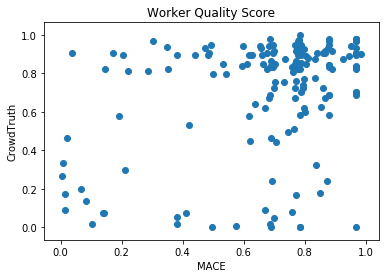

In [12]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

plt.scatter(
    mace_workers["competence"],
    crowdtruth_workers["wqs"],
)

plt.title("Worker Quality Score")
plt.xlabel("MACE")
plt.ylabel("CrowdTruth")

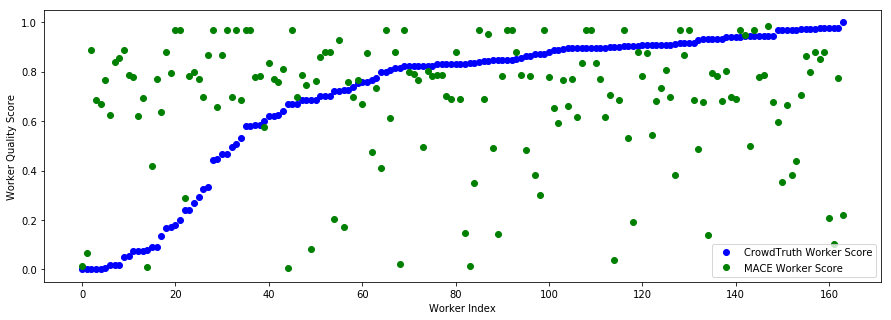

In [32]:
sortWQS = crowdtruth_workers.sort_values(['wqs'], ascending=[1])
sortWQS = sortWQS.reset_index()
worker_ids = list(sortWQS["worker"])

mace_workers = mace_workers.set_index('worker')
mace_workers.loc[worker_ids]

plt.rcParams['figure.figsize'] = 15, 5

plt.plot(np.arange(sortWQS.shape[0]), sortWQS["wqs"], 'bo', lw = 1, label = "CrowdTruth Worker Score")
plt.plot(np.arange(mace_workers.shape[0]), mace_workers["competence"], 'go', lw = 1, label = "MACE Worker Score")

plt.ylabel('Worker Quality Score')
plt.xlabel('Worker Index')
plt.legend()

# CrowdTruth vs. MACE vs. Majority Vote on Annotation Performance

In [65]:
majvote = pd.read_csv("../data/results/majorityvote_units_rte.csv")
mace = pd.read_csv("../data/results/mace_units_rte.csv")
crowdtruth = pd.read_csv("../data/results/crowdtruth_units_rte.csv")

In [78]:
def compute_F1_score(dataset, gt_value, gt_column):
    nyt_f1 = np.zeros(shape=(10, 2))
    for idx in xrange(0, 10):
        thresh = (idx + 1) / 10.0
        tp = 0
        fp = 0
        tn = 0
        fn = 0

        for gt_idx in range(0, len(dataset.index)):
            if dataset['true'].iloc[gt_idx] >= thresh:
                if dataset['gold'].iloc[gt_idx] == 1.0:
                    tp = tp + 1.0
                else:
                    fp = fp + 1.0
            else:
                if dataset['gold'].iloc[gt_idx] == 1.0:
                    fn = fn + 1.0
                else:
                    tn = tn + 1.0


        nyt_f1[idx, 0] = thresh
        if tp != 0:
            nyt_f1[idx, 1] = 2.0 * tp / (2.0 * tp + fp + fn)
        else:
            nyt_f1[idx, 1] = 0
    return nyt_f1

In [79]:
F1_crowdtruth = compute_F1_score(crowdtruth, 1, 'gold')
F1_crowdtruth

array([[0.1       , 0.58723404],
       [0.2       , 0.47105263],
       [0.3       , 0.390625  ],
       [0.4       , 0.35      ],
       [0.5       , 0.35      ],
       [0.6       , 0.32758621],
       [0.7       , 0.27777778],
       [0.8       , 0.24615385],
       [0.9       , 0.175     ],
       [1.        , 0.05238095]])

In [80]:
F1_mace = compute_F1_score(mace, 1, 'gold')
F1_mace

array([[0.1       , 0.92982456],
       [0.2       , 0.92793932],
       [0.3       , 0.92484076],
       [0.4       , 0.92464879],
       [0.5       , 0.92445583],
       [0.6       , 0.92426187],
       [0.7       , 0.92287918],
       [0.8       , 0.92010309],
       [0.9       , 0.9140625 ],
       [1.        , 0.02955665]])